In [1]:
from os import walk
from os.path import join
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

In [3]:
sys.getfilesystemencoding()

'utf-8'

In [12]:
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_CAT = 1

In [13]:
def email_body_generator(path):
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            filepath = join(root, file_name)
            #print(filepath)
       

In [14]:
email_body_generator(SPAM_1_PATH)

In [15]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            
            lines = []

            for line in stream:
                
                if is_body:
                    
                    lines.append(line)
                    
                elif line == '\n':
                    
                    is_body = True

            stream.close()
            
            email_body = '\n'.join(lines)
            
            yield file_name, email_body 

In [16]:
def df_from_directory(path, classification):
    
    
    rows = []
    
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [17]:
df_from_directory(SPAM_1_PATH, SPAM_CAT)

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
00497.ebf699da617b11135f3aa9173b9781b9,<html>\n\n<head>\n\n<title>Untitled Document</...,1
00498.48c3098854d339353f1a28a13b196017,This is an HTML email message. If you see thi...,1
00499.988506a852cf86b396771a8bdc8cf839,<html>\n\n<head>\n\n</head>\n\n <body backgro...,1
00500.85b72f09f6778a085dc8b6821965a76f,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",1


In [18]:
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
df_from_directory(SPAM_2_PATH, SPAM_CAT)

,MESSAGE,CATEGORY
00001.317e78fa8ee2f54cd4890fdc09ba8176,Greetings!\n\n\n\nYou are receiving this lette...,1
00002.9438920e9a55591b18e60d1ed37d992b,<html>\n\n<body>\n\n<center>\n\n<h3>\n\n<font ...,1
00003.590eff932f8704d8b0fcbe69d023b54d,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00004.bdcc075fa4beb5157b5dd6cd41d8887b,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00005.ed0aba4d386c5e62bc737cf3f0ed9589,"<html><xbody>\n\n<hr width = ""100%"">\n\n<cente...",1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [19]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails

C:\Users\User\AppData\Local\Temp\ipykernel_11852\3876589187.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [20]:
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
HAM_CAT = 0

In [21]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = pd.concat([ham_emails, df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT)])

ham_emails

,MESSAGE,CATEGORY
00001 (2).7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002 (2).9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [22]:
data=pd.concat([spam_emails, ham_emails])


In [23]:
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [24]:
data.isnull().any()

MESSAGE     False
CATEGORY    False
dtype: bool

In [25]:
data['MESSAGE'].isnull().sum()

0

In [26]:
(data.MESSAGE.str.len()==0).any()

True

In [27]:
(data.MESSAGE.str.len()==0).sum()

4

In [28]:
data[data.MESSAGE.str.len()==0]

,MESSAGE,CATEGORY
cmds,,1
cmds,,1
cmds,,0
.yestee_antony.txt,,0


In [29]:
data[data.MESSAGE.str.len()==0].index

Index(['cmds', 'cmds', 'cmds', '.yestee_antony.txt'], dtype='object')

In [33]:
data.isnull().sum()

MESSAGE     0
CATEGORY    0
dtype: int64

In [34]:
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [35]:
document_ids = range(0, len(data.index))
document_ids

range(0, 5798)

In [36]:
data['DOC_ID'] = document_ids
data

,MESSAGE,CATEGORY,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5793
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5794
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5795
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5796


In [37]:
data['FILE_NAME'] = data.index
data

,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5793,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5794,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5795,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5796,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896


In [38]:
data.set_index('DOC_ID', inplace = True)

In [39]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5793,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5794,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5795,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [40]:
DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
data.to_json(DATA_JSON_FILE)

In [41]:
print(data.CATEGORY.value_counts())

0    3902
1    1896
Name: CATEGORY, dtype: int64


In [42]:
spam_mails = data.CATEGORY.value_counts()[1]
spam_mails

1896

In [43]:
ham_mails = data.CATEGORY.value_counts()[0]
ham_mails

3902

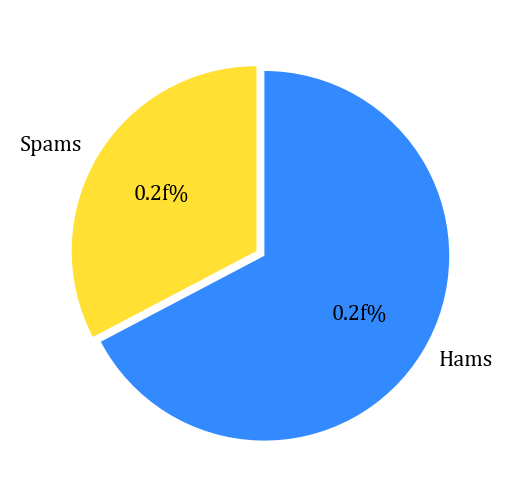

In [44]:
colors = ['#FFE033', '#338AFF']

category_names = ['Spams', 'Hams']

sizes = [spam_mails, ham_mails]

plt.figure(figsize = (3,3), dpi = 200)

plt.pie(sizes, labels = category_names, colors = colors, textprops = {'fontsize': 8, 'family': 'cambria', 'color': 'black'}, 
        startangle =90, autopct = "0.2f%%", explode = [0, 0.05], shadow = 0
       )
plt.show()

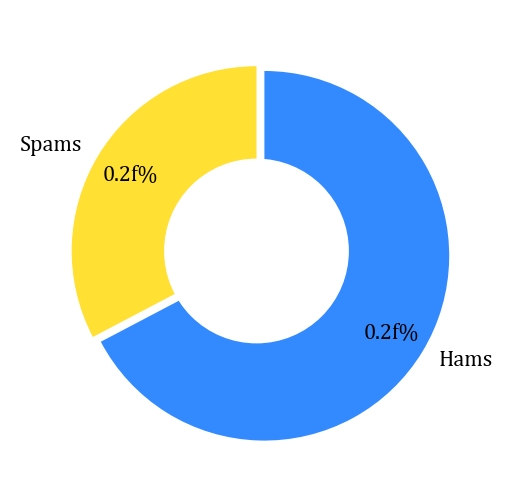

In [45]:
colors = ['#FFE033', '#338AFF']

category_names = ['Spams', 'Hams']

sizes = [spam_mails, ham_mails]

plt.figure(figsize = (3,3), dpi = 200)

plt.pie(sizes, labels = category_names, colors = colors, textprops = {'fontsize': 8, 'family': 'cambria', 'color': 'black'}, 
        startangle =90, autopct = "0.2f%%", explode = [0, 0.05], shadow = 0, pctdistance =0.8
       )

centre_circle = plt.Circle((0,0), radius = 0.5, fc = 'white')
plt.gca().add_artist(centre_circle)
plt.show()

## Natural language ToolKit

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stop_words = stopwords.words('english')
len(stop_words)

179

In [55]:
stop_words = set(stop_words)

In [60]:
msg = 'steams, steaming and no play makes Jack a dull boy. To be or not to be.? ;;@@ Nobody.fishing and fisher, steamer'

In [61]:
words = word_tokenize(msg.lower())
filtered_words = []
for word in words:
    if word not in stop_words  and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['steam', 'steam', 'play', 'make', 'jack', 'dull', 'boy', 'fisher', 'steamer']


In [62]:
html_doc = '''

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>

'''

In [63]:
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [64]:
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [65]:
data.at[18, 'MESSAGE']

'Lowest rates available for term life insurance! Take a moment and fill out our online form to see the low rate you qualify for. Save up to 70% from regular rates! Smokers accepted! http://www.newnamedns.com/termlife/ \n\n          \n\nRepresenting quality nationwide carriers. Act now!\n\n       \n\n       \n\n       \n\n       \n\n        \n\n---------------------------------------\n\nTo easily remove your address from the list, go to: \n\nhttp://www.newnamedns.com/stopthemailplease/\n\nPlease allow 48-72 hours for removal.\n\n\n'

In [66]:
soup = BeautifulSoup(data.at[18, 'MESSAGE'], 'html.parser')
print(soup.prettify())

Lowest rates available for term life insurance! Take a moment and fill out our online form to see the low rate you qualify for. Save up to 70% from regular rates! Smokers accepted! http://www.newnamedns.com/termlife/ 

          

Representing quality nationwide carriers. Act now!

       

       

       

       

        

---------------------------------------

To easily remove your address from the list, go to: 

http://www.newnamedns.com/stopthemailplease/

Please allow 48-72 hours for removal.



In [67]:
msg  = soup.prettify()
words = word_tokenize(msg.lower())
filtered_words = []
for word in words:
    if word not in stop_words  and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['lowest', 'rate', 'avail', 'term', 'life', 'insur', 'take', 'moment', 'fill', 'onlin', 'form', 'see', 'low', 'rate', 'qualifi', 'save', 'regular', 'rate', 'smoker', 'accept', 'http', 'repres', 'qualiti', 'nationwid', 'carrier', 'act', 'easili', 'remov', 'address', 'list', 'go', 'http', 'pleas', 'allow', 'hour', 'remov']


In [68]:
print(set(filtered_words))

{'remov', 'go', 'pleas', 'accept', 'easili', 'list', 'act', 'see', 'low', 'http', 'rate', 'smoker', 'address', 'allow', 'fill', 'life', 'qualiti', 'onlin', 'carrier', 'term', 'nationwid', 'repres', 'take', 'insur', 'moment', 'lowest', 'avail', 'save', 'hour', 'qualifi', 'form', 'regular'}


In [69]:
len(filtered_words)

36

In [70]:
len(set(filtered_words))

32

In [71]:
data.MESSAGE

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5793    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5794    > >-- be careful when using this one.) Also, t...
5795    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5796    So then, "Mark Hammond" <mhammond@skippinet.co...
5797    Hi there,\n\n\n\nNow this is probably of no us...
Name: MESSAGE, Length: 5798, dtype: object

In [72]:
type(data.MESSAGE)

pandas.core.series.Series

In [73]:
def clean_msg_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    soup = BeautifulSoup(message, 'html.parser')
    
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            
            stemmed_words = stemmer.stem(word)
            
            filtered_words.append(stemmed_words)
    return filtered_words
            
            

In [74]:
clean_msg_no_html('hello fishing?....How are you doing?....cleaner and cleanest')

['hello', 'fish', 'cleaner', 'cleanest']

In [75]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5793,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5794,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5795,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [76]:
data.MESSAGE

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5793    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5794    > >-- be careful when using this one.) Also, t...
5795    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5796    So then, "Mark Hammond" <mhammond@skippinet.co...
5797    Hi there,\n\n\n\nNow this is probably of no us...
Name: MESSAGE, Length: 5798, dtype: object

In [77]:
clean_msg_no_html(data.at[5, 'MESSAGE'])

['powerhous',
 'gift',
 'program',
 'want',
 'miss',
 'get',
 'founder',
 'major',
 'player',
 'one',
 'player',
 'privat',
 'invit',
 'expert',
 'call',
 'fastest',
 'way',
 'huge',
 'cash',
 'flow',
 'ever',
 'conceiv',
 'leverag',
 'question',
 'either',
 'want',
 'wealthi',
 'one',
 'toss',
 'financi',
 'lifelin',
 'sake',
 'hope',
 'grab',
 'onto',
 'hold',
 'tight',
 'ride',
 'life',
 'testimoni',
 'hear',
 'averag',
 'peopl',
 'first',
 'day',
 'receiv',
 'day',
 'al',
 'singl',
 'mother',
 'fl',
 'receiv',
 'last',
 'fl',
 'sure',
 'sent',
 'pledg',
 'got',
 'back',
 'next',
 'day',
 'ky',
 'money',
 'found',
 'partner',
 'work',
 'receiv',
 'last',
 'day',
 'think',
 'made',
 'right',
 'decis',
 'fl',
 'pick',
 'first',
 'day',
 'gave',
 'free',
 'lead',
 'train',
 'ca',
 'announc',
 'close',
 'sale',
 'help',
 'get',
 'fax',
 'blast',
 'immedi',
 'upon',
 'entri',
 'make',
 'money',
 'free',
 'lead',
 'train',
 'wait',
 'call',
 'fax',
 'back',
 'call',
 'best',
 'time',
 'me

In [78]:
nested_list = data['MESSAGE'].apply(clean_msg_no_html)

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [79]:
print(nested_list)

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5793    [http, bizarr, collect, stuf, anim, could, fet...
5794    [care, use, one, also, realli, cute, thing, ja...
5795    [sm, skip, montanaro, write, jeremi, put, anot...
5796    [mark, hammond, like, given, zodb, sound, attr...
5797    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5798, dtype: object


In [80]:
len(nested_list)

5798

In [84]:
flat_nested_list = []

for sublist in nested_list:
    
    for item in sublist:
        
        flat_nested_list.append(item)

In [85]:
len(flat_nested_list)

759691

In [86]:
print(len((flat_nested_list[:50])))

50


In [87]:
nested_list_spam = nested_list[data.CATEGORY ==1]

In [88]:
nested_list_spam 

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [89]:
nested_list_ham = nested_list[data.CATEGORY == 0]
nested_list_ham

DOC_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1898    [martin, post, tasso, papadopoulo, greek, scul...
1899    [martin, post, tasso, papadopoulo, greek, scul...
1900    [man, threaten, explos, moscow, thursday, augu...
                              ...                        
5793    [http, bizarr, collect, stuf, anim, could, fet...
5794    [care, use, one, also, realli, cute, thing, ja...
5795    [sm, skip, montanaro, write, jeremi, put, anot...
5796    [mark, hammond, like, given, zodb, sound, attr...
5797    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3902, dtype: object

In [90]:
flat_list_ham = []

for sublist in nested_list_ham:
        
    for item in sublist:
        
        flat_list_ham .append(item)

In [91]:
flat_list_spam = []

for sublist in nested_list_spam:
        
    for item in sublist:
        
        flat_list_spam .append(item)

In [92]:
len(flat_list_ham) + len(flat_list_spam)

759691

In [93]:
len(flat_nested_list)

759691

In [94]:
len(flat_list_ham)

442209

In [95]:
len(flat_list_spam)

317482

In [96]:
nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5793    [http, bizarr, collect, stuf, anim, could, fet...
5794    [care, use, one, also, realli, cute, thing, ja...
5795    [sm, skip, montanaro, write, jeremi, put, anot...
5796    [mark, hammond, like, given, zodb, sound, attr...
5797    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5798, dtype: object

In [97]:
email_lengths = []

for sublist in nested_list:
    
    email_lengths.append(len(sublist))

In [98]:
print(email_lengths[:10])

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44]


In [99]:
max(email_lengths)

7671

In [100]:
np.argmax(email_lengths)

5777

In [101]:
np.argmin(email_lengths)

22

In [102]:
data[5777:5778]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5777,------------------------ Yahoo! Groups Sponsor...,0,01380.e3fad5af747d3a110008f94a046bf31b


In [103]:
data.iat[5,0]

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [104]:
data.iloc[5,0]

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [105]:
unique_words = pd.Series(flat_nested_list).value_counts()
unique_words

http         10663
use           5022
list          4852
email         4368
get           4201
             ...  
aspers           1
zoppi            1
spinmeist        1
deneb            1
oreilli          1
Length: 27332, dtype: int64

In [106]:
frequent_words = unique_words[:2500]
frequent_words

http         10663
use           5022
list          4852
email         4368
get           4201
             ...  
asian           44
overnight       43
analog          43
steven          43
liquid          43
Length: 2500, dtype: int64

In [107]:
print(frequent_words.index)

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'ximian', 'con', 'dedic', 'pleasur', 'capitalist', 'asian', 'overnight',
       'analog', 'steven', 'liquid'],
      dtype='object', length=2500)


In [108]:
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index})

In [109]:
vocab

,VOCAB_WORD
0,http
1,use
2,list
3,email
4,get
...,...
2495,asian
2496,overnight
2497,analog
2498,steven


In [110]:
vocab.index.name = 'WORD_ID'

In [111]:
vocab

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,asian
2496,overnight
2497,analog


In [112]:
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'
vocab.to_csv(WORD_ID_FILE, index_label = vocab.index.name, header = vocab.VOCAB_WORD.name)

In [119]:
type(nested_list)

pandas.core.series.Series

In [120]:
nested_list_after_tolist=nested_list.tolist()

In [121]:
word_column_df = pd.DataFrame.from_records(nested_list_after_tolist)
word_column_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [122]:
X_train, X_test, y_train, y_test = train_test_split(word_column_df, data.CATEGORY, test_size = 0.3, random_state = 42)

In [123]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
4695,anyon,experi,use,digit,camera,linux,think,buy,one,camera,...,None,None,None,None,None,None,None,None,None,None
2615,destin,new,realiti,tv,show,anarchist,hunt,rais,polic,ire,...,None,None,None,None,None,None,None,None,None,None
5071,thu,jul,matthia,saou,wrote,upon,time,matthia,wrote,see,...,None,None,None,None,None,None,None,None,None,None
1293,tremend,save,toner,inkjet,fax,thermal,replenish,toner,go,secret,...,None,None,None,None,None,None,None,None,None,None
4356,forteana,jayn,ayri,wrote,think,letter,oh,right,give,go,...,None,None,None,None,None,None,None,None,None,None


In [124]:
X_train.index.name = y_train.index.name = 'DOC_ID'
X_test.index.name=y_test.index.name='DOC_ID'

In [125]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4695,anyon,experi,use,digit,camera,linux,think,buy,one,camera,...,None,None,None,None,None,None,None,None,None,None
2615,destin,new,realiti,tv,show,anarchist,hunt,rais,polic,ire,...,None,None,None,None,None,None,None,None,None,None
5071,thu,jul,matthia,saou,wrote,upon,time,matthia,wrote,see,...,None,None,None,None,None,None,None,None,None,None
1293,tremend,save,toner,inkjet,fax,thermal,replenish,toner,go,secret,...,None,None,None,None,None,None,None,None,None,None
4356,forteana,jayn,ayri,wrote,think,letter,oh,right,give,go,...,None,None,None,None,None,None,None,None,None,None


In [126]:
y_test.head()

DOC_ID
3734    0
1103    1
812     1
1632    1
1128    1
Name: CATEGORY, dtype: int64

In [127]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'ximian', 'con', 'dedic', 'pleasur', 'capitalist', 'asian', 'overnight',
       'analog', 'steven', 'liquid'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [128]:
word_index.get_loc('analog')

2497

In [129]:
word_index.get_loc('http')

0

In [130]:
def make_sparse_matrix(df, indexed_words, labels):
    
    nr_rows = df.shape[0]
    
    nr_cols = df.shape[1]
    
    
    word_set = set(indexed_words)
    
    dict_list = []
    
    
    for i in range(nr_rows):
        
        for j in range(nr_cols):
            
            word = df.iat[i,j]
            
            if word in word_set:
                
                doc_id = df.index[i]
                
                word_id = indexed_words.get_loc(word)
                
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id, 'OCCURRENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

In [131]:
sparse_train_df =  make_sparse_matrix(X_train, word_index, y_train)
sparse_train_df

,LABEL,DOC_ID,OCCURRENCE,WORD_ID
0,0,4695,1,148
1,0,4695,1,317
2,0,4695,1,1
3,0,4695,1,608
4,0,4695,1,1760
...,...,...,...,...
429324,1,860,1,47
429325,1,860,1,1434
429326,1,860,1,26
429327,1,860,1,21


In [133]:
train_grouped = sparse_train_df.groupby(['DOC_ID',  'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURRENCE
DOC_ID WORD_ID LABEL            
0      2       1               1
       3       1               2
       4       1               1
       7       1               3
       11      1               1
...                          ...
5797   2031    0               1
       2035    0               2
       2249    0               1
       2347    0               1
       2374    0               1

[259350 rows x 1 columns]

In [134]:
train_grouped = train_grouped.reset_index()
train_grouped

,DOC_ID,WORD_ID,LABEL,OCCURRENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1
...,...,...,...,...
259345,5797,2031,0,1
259346,5797,2035,0,2
259347,5797,2249,0,1
259348,5797,2347,0,1


In [135]:
TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [136]:
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)
sparse_test_df

,LABEL,DOC_ID,OCCURRENCE,WORD_ID
0,0,3734,1,109
1,0,3734,1,0
2,0,3734,1,76
3,0,3734,1,339
4,0,3734,1,690
...,...,...,...,...
203377,0,5040,1,130
203378,0,5040,1,107
203379,0,5040,1,161
203380,0,5040,1,53


In [137]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped

,DOC_ID,WORD_ID,LABEL,OCCURRENCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2
...,...,...,...,...
116874,5792,1346,0,1
116875,5792,1586,0,1
116876,5792,1668,0,1
116877,5792,2078,0,1


In [138]:
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

In [139]:
len(X_test)

1740

In [140]:
len(X_train)

4058

In [142]:
len(test_grouped.DOC_ID.unique())

1725

In [143]:
len(X_test) - len(test_grouped.DOC_ID.unique())   

15

In [144]:
len(X_train) - len(train_grouped.DOC_ID.unique())

44

In [146]:
set(X_test.index) - set(test_grouped.DOC_ID.unique())

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [148]:
data.MESSAGE[339]

'------=_NextPart_000_00C5_22E25E1D.D0727B17\n\nContent-Type: text/plain; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nIA0KICAgICAgICAgICAgICAgICBEbyBZb3UgV2FudCBUbyBUZWFjaCBhbmQg\n\nR3JvdyBSaWNoPw0KDQoNCg0KDQoNCklmIHlvdSBhcmUgYSBtb3RpdmF0ZWQg\n\nYW5kIHF1YWxpZmllZCBjb21tdW5pY2F0b3IsIEkgd2lsbCBwZXJzb25hbGx5\n\nIHRyYWluIHlvdSB0byBkbyAzICAyMCBtaW51dGVzIHByZXNlbnRhdGlvbnMg\n\ncGVyIGRheSB0byBxdWFsaWZ5IHByb3NwZWN0cyB0aGF0IEkgY2FuIHByb3Zp\n\nZGUgdG8geW91LiAgV2Ugd2lsbCBkZW1vbnN0cmF0ZSB0byB5b3UgdGhhdCB5\n\nb3UgY2FuIG1ha2UgJDQwMCBhIGRheSBwYXJ0IHRpbWUgdXNpbmcgdGhpcyBz\n\neXN0ZW0uICBPciwgaWYgeW91IGhhdmUgMjAgaG91cnMgcGVyIHdlZWssIGFz\n\nIGluIG15IGNhc2UsIHlvdSBjYW4gbWFrZSBpbiBleGNlc3Mgb2YgJDEwLDAw\n\nMCBwZXIgd2VlaywgYXMgSSBhbSBjdXJyZW50bHkgZ2VuZXJhdGluZyAodmVy\n\naWZpYWJsZSwgYnkgdGhlIHdheSkuICANCg0KUGx1cyBJIHdpbGwgaW50cm9k\n\ndWNlIHlvdSB0byBteSBtZW50b3Igd2hvIG1ha2VzIHdlbGwgaW4gZXhjZXNz\n\nIG9mICQxLDAwMCwwMDAgYW5udWFsbHkuDQoNCk1hbnkgYXJlIGNhbGxlZCwg\n\nZmV3IGFyZSBjaG9zZW4uICBUa

In [149]:
file_number_135 = 'SpamData/01_Processing/spam_assassin_corpus/spam_1/00135.00e388e3b23df6278a8845047ca25160'


In [150]:
file_number_135_stream = open(file_number_135)
message_135 = file_number_135_stream.read()
file_number_135_stream.close()
print(message_135)

From new_adult_toys_0463b54@yahoo.com  Wed Aug 28 11:04:02 2002
Return-Path: <new_adult_toys_0463b54@yahoo.com>
Delivered-To: zzzz@localhost.spamassassin.taint.org
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 32C7943F99
	for <zzzz@localhost>; Wed, 28 Aug 2002 06:03:57 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Wed, 28 Aug 2002 11:03:57 +0100 (IST)
Received: from yahoo.com (IDENT:squid@[211.57.23.142]) by
    dogma.slashnull.org (8.11.6/8.11.6) with SMTP id g7RJLTZ22353 for
    <webmaster@efi.ie>; Tue, 27 Aug 2002 20:21:30 +0100
Received: from 144.60.76.182 ([144.60.76.182]) by smtp4.cyberecschange.com
    with SMTP; 28 Aug 0102 14:16:34 -0100
Received: from pet.vosni.net ([179.59.188.175]) by
    smtp-server.tampabayr.com with smtp; 28 Aug 0102 13:11:42 -0900
Received: from 179.125.241.6 ([179.125.241.6]) by smtp-server1.cflrr.com
    with a